## DExB2 Class Test

In [ ]:
# Analysis modules
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import shapiro 
from statsmodels.formula.api import ols


Work through this notebook, looking up code wherever needed from your notebooks, presentations, cheat sheets or online.

#### Show your working!
We need to see how you have got to your answers so put in notes and upload your notebook to learn at the end of the test.  

#### You may well not finish 
The test is designed to be tight for time.  Work through as much as you can.  

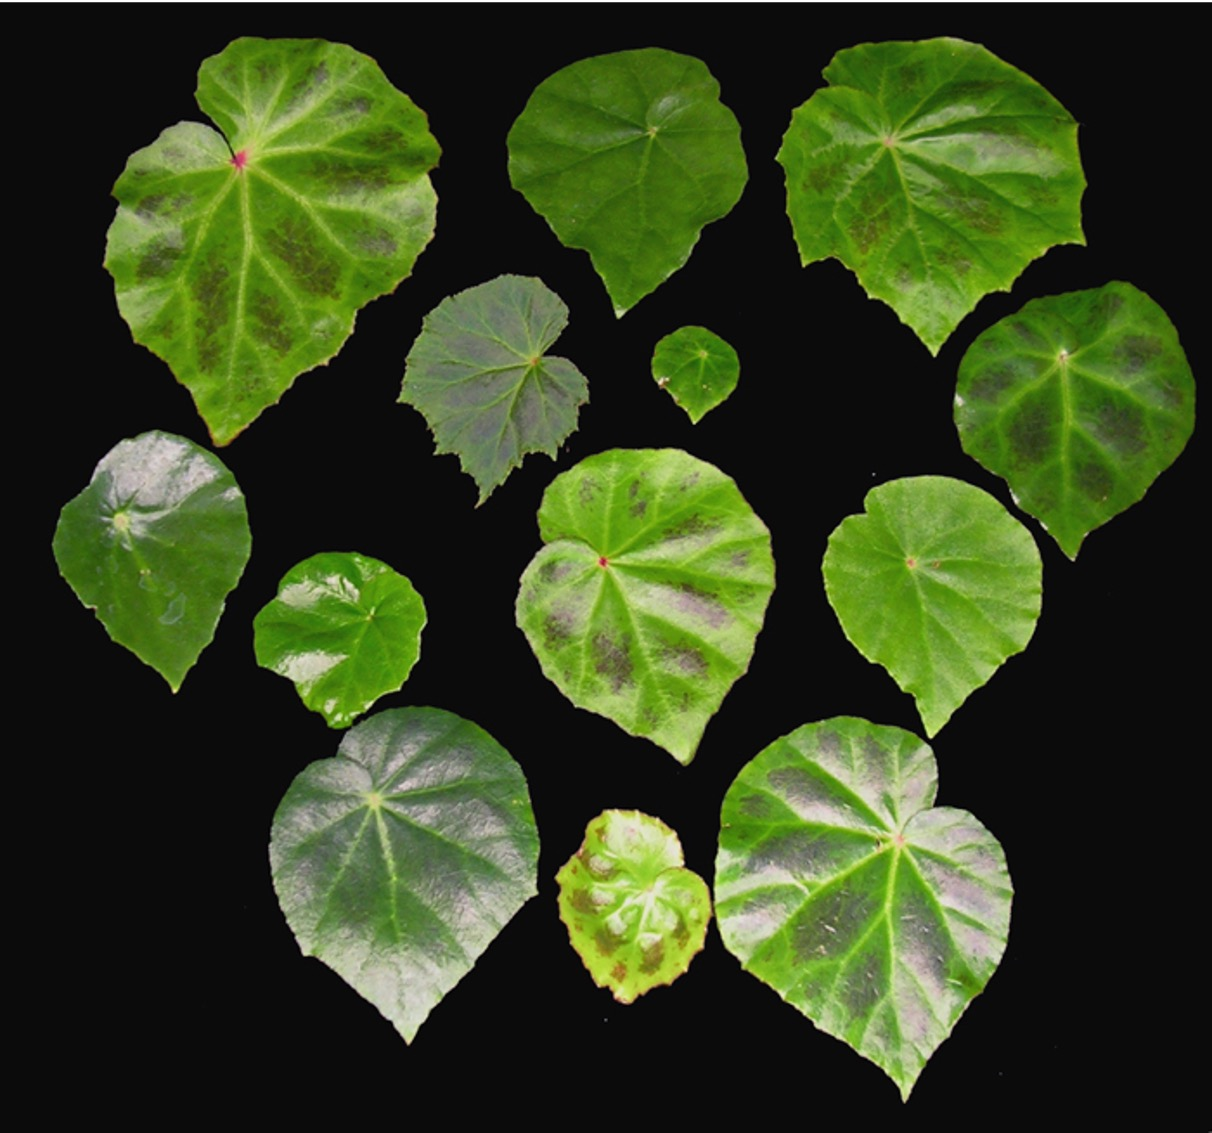

Mobina and Zhang-Ling have gathered data on leaf form and function from a population of Begonias.  

Mobina_plant has data on shape and size of leaf and leaf anatomy.  
Mobina_eco has data on the leaf function.  
Zhang-Ling's data is on the patterning of stomata across the leaf.  Begonia have stomata clustered in groups - stomatal complexes.  She has counted the number of stomatal complexes and the average number of stomata in each complex, at different position across the leaf.  

Read in the three data files in the folder `Leaf_function`.  Check their structure and metrics using
 
     shape
     describe
     head
     
Mobina_plant has definitions of the metrics in the first line.  You will need to skip this.
The definitions are also in a text file - Metric_detail.txt if you need them.

How many data rows in Mobina_plant?

<div class = "alert alert-danger">
Q1 How many data rows are there in Mobina_plant? (1 mark)
    
    a 87  
    b 103 
    c 119  
    d 234 
    e 471 
    
    
Enter your answer on LEARN

<div class = "alert alert-danger">
Q2 In Mobina_plant, what is the Circularity of the leaf with the greatest area (1 mark)
    
    a 71.65  
    b 62.45 
    c 90.40  
    d 48.69 
    e 77.45 
    
    
Enter your answer on LEARN

In [ ]:
ZL.describe()

<div class = "alert alert-danger">
Q3 What is the mean number of stomata per complex at the tip of the leaf  (Av_stom_per_SC_tip) in Zhang Ling's dataset? (1 mark)
    
    a 2.87  
    b 2.12
    c 1.72
    d 1.56
    e 1.22 
    
    
Enter your answer on LEARN

Mobina is interested in how leaf shape and anatomy relate to photosynthetic function.   
The first two columns in Mobina_plant are the leaf area and the leaf's perimeter.  Calculate a new column giving a measure of leaf dissection using Perimeter squared over Area.

<div class = "alert alert-danger">
Q4 What is the maximum value of this new measure for dissection (1 mark)

    a 28.45  
    b 17.32
    c 20.03
    d 21.34
    e 26.69  
    
    
Enter your answer on LEARN

Mobina has measured Amax (Photosynthetic rate in μmol mm<sup>−2</sup> sec<sup>−1</sup>) and Chlorophyll Content.
Are either of these measures normally distributed?

Plot histograms of each trait.  Check for normality of distribution using the Shapiro-Wilk test.
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html


In [ ]:
# make histogram

In [ ]:
#perform Shapiro-Wilk test for normality


<div class = "alert alert-danger">

Q5 What is the P value shapiro wilkes test for Chlorophyll Content (1 mark)

    a 0.00 
    b 0.02
    c 0.43
    d 0.56
    e 0.78 
    
Enter your answer on LEARN

<div class = "alert alert-danger">
Q6 Upload to LEARN the plot which does not fit a normal distribution (2 marks)
    


### Stomatal Distribution

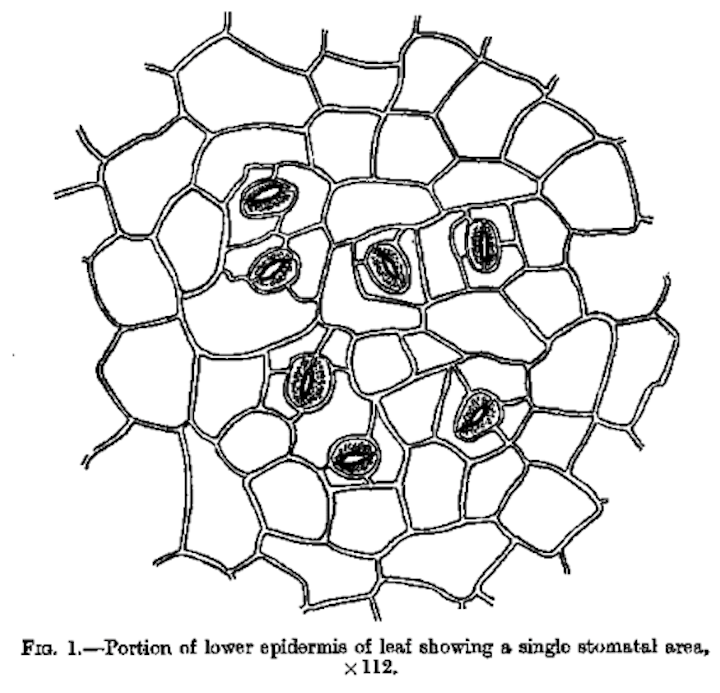

Zhang-Ling's data has counts of the number of stomatal complexs seen in each field of view under the microscope (SC_per_field) and averages of the number of stomata per complex (Av_stom_per_SC).  She has this data for the tip, middle, left and right of the leaf.  Does her data support the hypothesis that stomata and stomatal complexs are arranged evenly across the leaf?

Zhang Ling's data is in wide form with a column for each metric (Stomatal complex per field of view) and Average number of Stomata per complex) for each position (tip, leaf, right, mid).  Re-arrange this into long form, giving one column for plant_number, one column for metric (SC_per_field, and Av_stom_per_SC), and one column for the values.  

use 

    pd.melt
    
    id_vars =['plant_number'], 
    value_vars =['SC_per_field tip', 'Av_stom_per_SC tip', 'SC_per_field mid',
       'Av_stom_per_SC mid', 'SC_per_field left', 'Av_stom_per_SC left',
       'SC_per_field right', 'Av_stom_per_SC right']

This is what it should look like:

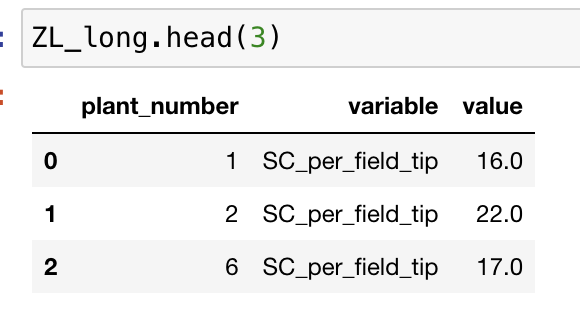

Use groupby() to get the mean value for each variable

<div class = "alert alert-danger">
Q6 The highest mean number of stomatal complexes per field of view is (1 mark)
    
    a 13.7 on the right hand side of the leaf 
    b 12.6 on the right hand side of the leaf 
    c 14.9 at the tip of the leaf 
    d 17.5 on the left hand side of the leaf 
    e 15.3 on in the middle of the leaf 
    
    
Enter your answer on LEARN

Make the leaf position and the metric measured into separate columns.  

To split the value vars into metrics (Av_stom_per_SC, and SC_per_field) and positions (top,left, right, mid), use

     .str.split()
     
We have provided the code that implements this.

Finally tidy up by dropping the variable column.

In [ ]:
ZL_long['position'], ZL_long['metric'] = ZL_long['variable'].str.split().str

Plot each metric as boxplots coloured by postion. Use

    sns.catplot()
    
to give a separate axis for each metric

    sharey=False

<div class = "alert alert-danger">
Q7 Upload the plot to LEARN (2 marks)
    


Does position have a significant effect on either metric?  
Fit models of stomatal complex per field and position, and of the average number of stomata per stomatal complex by position using `ols()`. 

Specify which part of the dataframe to use with

`df[df.metric == "SC_per_field"])`
`df[df.metric == "Av_stom_per_SC"])`

     `value ~ position`

<div class = "alert alert-danger">
Q8 What is the p-value for the effect of postion = tip on Av_stom_per_SC? (1 mark)
    
    a 0.000  
    b 0.745
    c 0.014
    d 0.155
    e 0.568
    
    
Enter your answer on LEARN

Join the two Mobina datasets as a left join using `pd.merge`, adding the one with more data to the one with less.

Modify the form of the plant identity column in Mobina's ecophysiology data to the form:
        
            360_xxx
            
For Mobina's ecophysiology data try `str.replace`


Plot Photosynthesis (Amax) by the depth of the palisade mesophyll (dpm) 
Add legend with the full description of the metric and a title

Amax is measured in μmol m−2 sec−1.  
dpm is measured in μm


<div class = "alert alert-danger">
Q9 Upload the plot to LEARN (2 marks)
    


Plot Photosynthesis (Amax) by the depth of the palisade mesophyll (dpm) 

<div class = "alert alert-danger">
Q10 Considering the 95% CI of the mean relationship between Amax and dpm, would you expect the relationship (ie the slope) to be statistically significant (1 mark)
    
    a Yes as 95% CI includes 0
    b No as 95% CI includes 0
    c Yes P value is 
    
Enter your answer on LEARN

<div class = "alert alert-danger">
Q11 If you were to use all the metrics data to look for subdivsions within this popluation of plants what approach would you use? (1 mark)
    
    a classification
    b Regression
    c Clustering
    d Dimension reduction
    e Multivariant transformation
    
